In [62]:
from google.colab import drive
!pip install duckdb==0.5.1
import duckdb
import pandas as pd
import os
from sklearn import metrics 
!pip install pickle-mixin
import pickle
#!ipython nbconvert --to html notebook.ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
conn = duckdb.connect("/content/drive/MyDrive/ADSDB BASES DE DATOS/copy_DB_Train&Test",read_only=False)
existingTables=conn.execute("SHOW TABLES").fetchall()
existingTables

[('test_data',), ('train_data',)]

In [65]:

test=conn.execute("SELECT * from test_data").fetchdf()
train=conn.execute("SELECT * from train_data").fetchdf()

In [67]:
X_test = test.iloc[:, test.columns!="status"]
y_test = test.status

X_train = train.iloc[:, train.columns!="status"]
y_train = train.status

In [69]:
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler



In [70]:
clf = pickle.load(open('/content/drive/MyDrive/ADSDB BASES DE DATOS/model.pkl', 'rb'))


In [71]:
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred),4))

Accuracy: 0.9389


# **Decision Tree Plot**

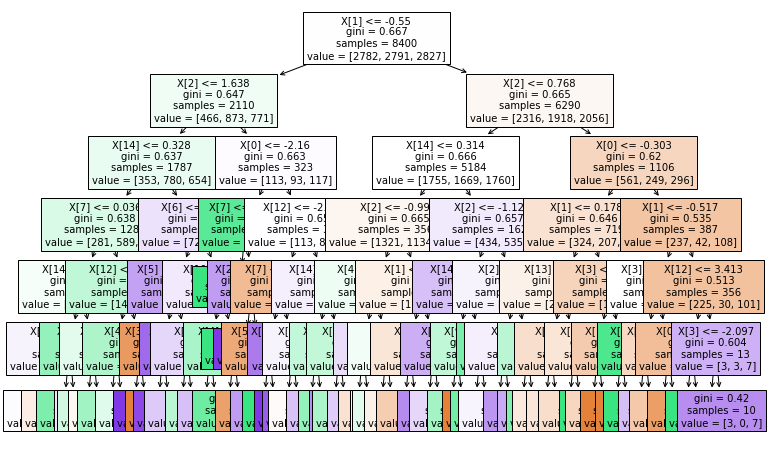

In [72]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=6)
dt = dt.fit(X_train,y_train)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree.plot_tree(dt, filled=True, fontsize=10)
plt.show()

In [73]:
!pip install scikit-plot
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_predict, train_test_split
import scikitplot as skplt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Confusion Matrix**

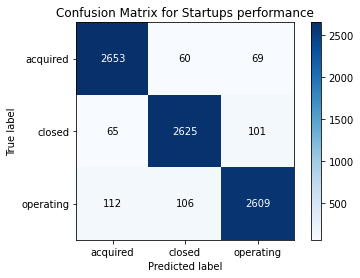

In [74]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title = 'Confusion Matrix for Startups performance')

Display confusion matrix with normalized values between 0 to 1 simply set normalize parameter to True

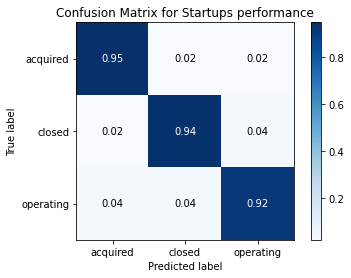

In [75]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, title = 'Confusion Matrix for Startups performance')

# **Receiver Operating Characteristic (ROC) Curve**

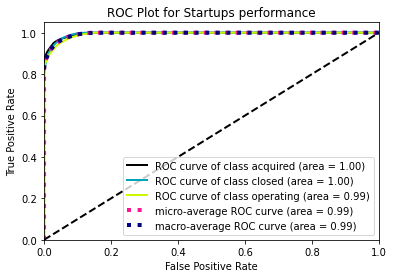

In [76]:
y_prob=clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob, title = 'ROC Plot for Startups performance')

# **Precision Recall Curve (PR Curve)**

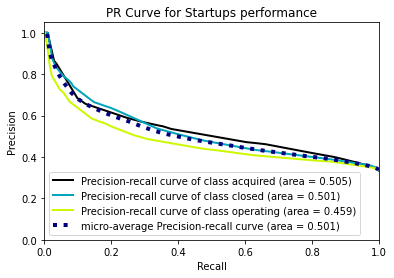

In [47]:
skplt.metrics.plot_precision_recall(y_test, y_prob, title = 'PR Curve for Startups performance')

In [48]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)

In [49]:
y_rfc_proba = rfc_model.predict_proba(X_test)
y_rfc_pred = np.where(y_rfc_proba[:,1] > 0.5, 1, 0)

In [95]:
from sklearn.calibration import CalibratedClassifierCV
cal_clf = CalibratedClassifierCV(clf, method="sigmoid", cv="prefit")
cal_clf.fit(X_test, y_test)

CalibratedClassifierCV(base_estimator=DecisionTreeClassifier(max_depth=20),
                       cv='prefit')

In [98]:
y_test.head()

0    operating
1     acquired
2    operating
3       closed
4    operating
Name: status, dtype: object

# **Probability Calibration for 3-class classification**

Calibration plots also known as probability calibration curves is a diagnostic method to check if the predicted value can directly be interpreted as confidence level.
Below we plot a 2-simplex with arrows showing the change in predicted probabilities of the test samples.

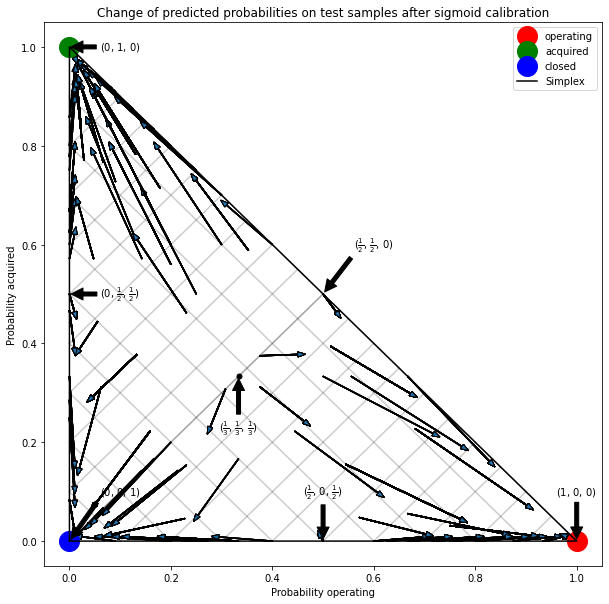

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
colors = ["r", "g", "b"]

clf_probs = clf.predict_proba(X_test)
cal_clf_probs = cal_clf.predict_proba(X_test)
# Plot arrows
for i in range(clf_probs.shape[0]):
    plt.arrow(
        clf_probs[i, 0],
        clf_probs[i, 1],
        cal_clf_probs[i, 0] - clf_probs[i, 0],
        cal_clf_probs[i, 1] - clf_probs[i, 1],
        #color=colors[y_test[i]],
        head_width=1e-2,
    )

# Plot perfect predictions, at each vertex
plt.plot([1.0], [0.0], "ro", ms=20, label="operating")
plt.plot([0.0], [1.0], "go", ms=20, label="acquired")
plt.plot([0.0], [0.0], "bo", ms=20, label="closed")

# Plot boundaries of unit simplex
plt.plot([0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], "k", label="Simplex")

# Annotate points 6 points around the simplex, and mid point inside simplex
plt.annotate(
    r"($\frac{1}{3}$, $\frac{1}{3}$, $\frac{1}{3}$)",
    xy=(1.0 / 3, 1.0 / 3),
    xytext=(1.0 / 3, 0.23),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.plot([1.0 / 3], [1.0 / 3], "ko", ms=5)
plt.annotate(
    r"($\frac{1}{2}$, $0$, $\frac{1}{2}$)",
    xy=(0.5, 0.0),
    xytext=(0.5, 0.1),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.annotate(
    r"($0$, $\frac{1}{2}$, $\frac{1}{2}$)",
    xy=(0.0, 0.5),
    xytext=(0.1, 0.5),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.annotate(
    r"($\frac{1}{2}$, $\frac{1}{2}$, $0$)",
    xy=(0.5, 0.5),
    xytext=(0.6, 0.6),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.annotate(
    r"($0$, $0$, $1$)",
    xy=(0, 0),
    xytext=(0.1, 0.1),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.annotate(
    r"($1$, $0$, $0$)",
    xy=(1, 0),
    xytext=(1, 0.1),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.annotate(
    r"($0$, $1$, $0$)",
    xy=(0, 1),
    xytext=(0.1, 1),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
# Add grid
plt.grid(False)
for x in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    plt.plot([0, x], [x, 0], "k", alpha=0.2)
    plt.plot([0, 0 + (1 - x) / 2], [x, x + (1 - x) / 2], "k", alpha=0.2)
    plt.plot([x, x + (1 - x) / 2], [0, 0 + (1 - x) / 2], "k", alpha=0.2)

plt.title("Change of predicted probabilities on test samples after sigmoid calibration")
plt.xlabel("Probability operating")
plt.ylabel("Probability acquired")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
_ = plt.legend(loc="best")

In [123]:
conn.close() 